In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(288, 352, 3)


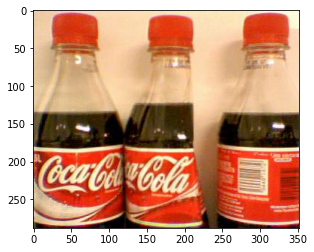

In [27]:
my_image = cv2.imread('image001.jpg')
my_image= cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(my_image)
print(my_image.shape)


In [29]:
resized_image = cv2.resize(my_image, (350, 280))
print(my_image.shape)
print(resized_image.shape)

(288, 352, 3)
(280, 350, 3)


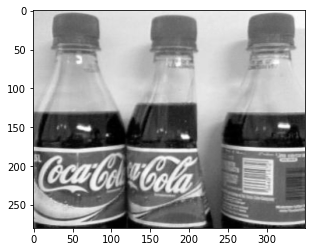

In [30]:
gray_image = cv2.cvtColor (resized_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

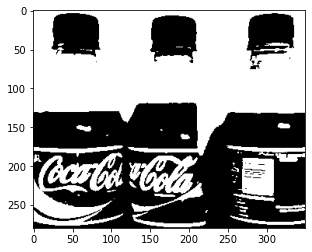

In [33]:
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')

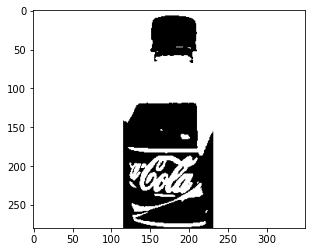

In [37]:
# Make borders white
width = binary_image.shape[1]
start_point= width // 3
end_point = start_point * 2
binary_image[:,0: start_point] = 255
binary_image[:, end_point:width] = 255
plt.imshow(binary_image, cmap='gray')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [6]:
train_datagen = ImageDataGenerator (rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory("Desktop/data/train", target_size= (224, 22), batch_size=1, class_mode='categorical')
test_generator = train_datagen.flow_from_directory("Desktop/data/test", target_size = (224,224), batch_size=1, class_mode='categorical')

Found 14 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
input_shape=(224,224,3),
include_top = False,
weights='imagenet',
pooling='avg'
)
pretrained_model.trainable = False

In [ ]:
pretrained_model.summary()

In [ ]:
x = tf.keras.layers.Dense (128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128,
activation='relu')(x)
my outputs = tf.keras.layers.Dense(2, activation=' softmax')(x)

In [ ]:
my inputs = pretrained model.input